In [4]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

data = TimeSeriesDataFrame('https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly/train.csv')


/Users/alexw/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
data.columns = ["stock_price"]
data.head()

stock_price
item_id timestamp                       
H1      1750-01-01 00:00:00        605.0
        1750-01-01 01:00:00        586.0
        1750-01-01 02:00:00        586.0
        1750-01-01 03:00:00        559.0
        1750-01-01 04:00:00        511.0

In [13]:
# predictor = TimeSeriesPredictor(target='stock_price', prediction_length=48).fit(data)
predictor = TimeSeriesPredictor().load("AutogluonModels/ag-20231011_195639/")
predictions = predictor.predict(data)
predictions

Loading predictor from path AutogluonModels/ag-20231011_195639/
Global seed set to 123


mean         0.1         0.2         0.3  \
item_id timestamp                                                             
H1      1750-01-30 04:00:00  654.572082  604.061323  621.146403  633.626660   
        1750-01-30 05:00:00  586.781343  531.603629  551.969946  565.410772   
        1750-01-30 06:00:00  538.021542  481.304921  501.727566  516.106068   
        1750-01-30 07:00:00  506.053530  449.622311  468.774581  482.567667   
        1750-01-30 08:00:00  482.995179  422.908277  445.294972  459.413712   
...                                 ...         ...         ...         ...   
H414    1750-02-11 19:00:00   59.039926  -40.986360   -8.842962   17.545785   
        1750-02-11 20:00:00   50.590771  -45.486396  -13.008317   10.976595   
        1750-02-11 21:00:00   42.140470  -48.426982  -18.560077    4.132551   
        1750-02-11 22:00:00   31.147076  -52.924845  -24.381683   -4.132208   
        1750-02-11 23:00:00   21.612933  -71.747874  -39.666907  -17.032630   

                                    0.4         0.5         0.6         0.7  \
item_id timestamp                                                             
H1      1750-01-30 04:00:00  644.207116  653.437242  663.940908  675.112044   
        1750-01-30 05:00:00  575.980232  586.338173  595.886824  608.224424   
        1750-01-30 06:00:00  527.227399  537.521733  548.235761  561.053916   
        1750-01-30 07:00:00  494.474403  505.392217  516.453530  529.534254   
        1750-01-30 08:00:00  471.620401  481.917153  493.684968  507.033758   
...                                 ...         ...         ...         ...   
H414    1750-02-11 19:00:00   38.837997   57.811484   76.730209   99.173246   
        1750-02-11 20:00:00   30.711786   49.482435   67.902720   87.093361   
        1750-02-11 21:00:00   23.152077   40.460855   58.746227   77.600667   
        1750-02-11 22:00:00   13.843945   29.055456   47.097895   64.173377   
        1750-02-11 23:00:00    2.577155   20.373911   39.229899   58.428289   

                                    0.8         0.9  
item_id timestamp                                    
H1      1750-01-30 04:00:00  687.495943  706.546878  
        1750-01-30 05:00:00  621.758514  642.082924  
        1750-01-30 06:00:00  574.082203  593.728450  
        1750-01-30 07:00:00  543.066694  565.295314  
        1750-01-30 08:00:00  522.536915  541.627713  
...                                 ...         ...  
H414    1750-02-11 19:00:00  123.624724  156.369762  
        1750-02-11 20:00:00  110.926216  143.952461  
        1750-02-11 21:00:00   99.625531  129.191825  
        1750-02-11 22:00:00   84.874289  113.215833  
        1750-02-11 23:00:00   81.204492  113.195080  

[19872 rows x 10 columns]

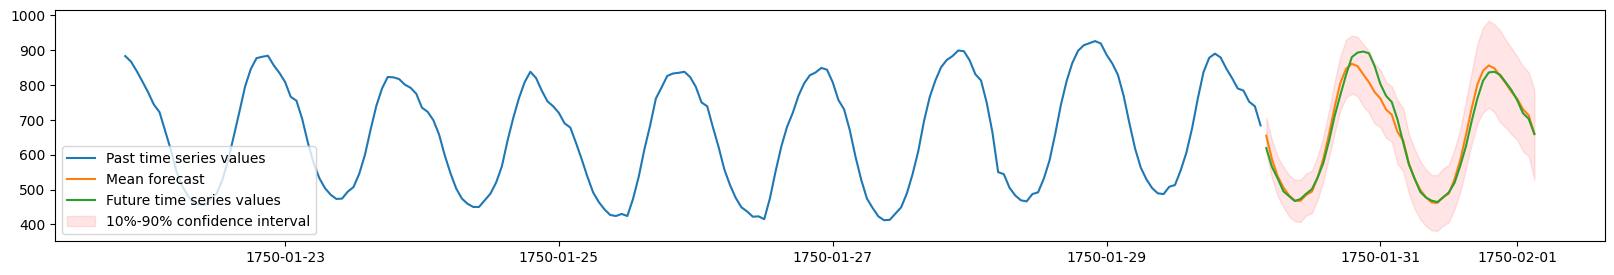

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# TimeSeriesDataFrame can also be loaded directly from a file
test_data = TimeSeriesDataFrame.from_path("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly_subset/test.csv")

plt.figure(figsize=(20, 3))

item_id = "H1"
y_past = data.loc[item_id]["stock_price"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["target"][-48:]

plt.plot(y_past[-200:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend()

In [19]:
import pandas as pd
# in a dataframe compare predicted vs actual
df = pd.DataFrame()
df["actual"] = y_test
df["predicted"] = y_pred["mean"]
df.head(10)

,actual,predicted
timestamp,,
1750-01-30 04:00:00,619.0,654.572082
1750-01-30 05:00:00,565.0,586.781343
1750-01-30 06:00:00,532.0,538.021542
1750-01-30 07:00:00,495.0,506.053530
1750-01-30 08:00:00,481.0,482.995179
1750-01-30 09:00:00,467.0,468.213599
1750-01-30 10:00:00,473.0,467.637963
1750-01-30 11:00:00,488.0,484.940966
1750-01-30 12:00:00,501.0,494.071998
